In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing

In [3]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [4]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2)

In [5]:
model = dtr.fit(data.data[:, [6, 7]], data.target)

In [6]:
from sklearn import tree
dot_data = tree.export_graphviz(dtr, out_file=None, feature_names=data.feature_names[6:8], filled=True, impurity=False, rounded=True)

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'

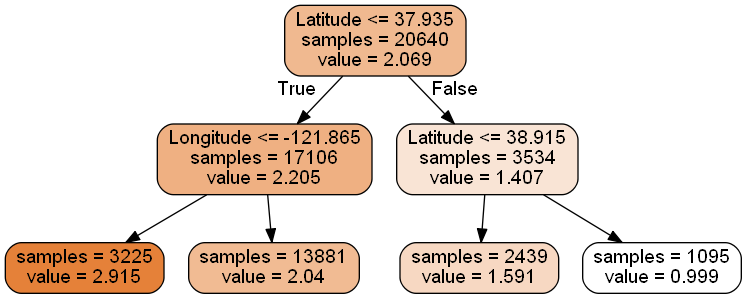

In [8]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image

Image(graph.create_png())

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, test_size = 0.1, random_state=42)
dtr2 = DecisionTreeRegressor(random_state=42)
dtr2.fit(X_train, y_train)
dtr2.score(X_test, y_test)

0.637355881715626

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn import set_config

set_config(print_changed_only=True)

In [12]:
tree_param_grid = {'min_samples_split':(3,6,9), 'n_estimators':(10,50,100)}
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': (3, 6, 9),
                         'n_estimators': (10, 50, 100)})

In [13]:
grid.best_params_,grid.best_score_

({'min_samples_split': 3, 'n_estimators': 100}, 0.8080578196104833)